In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import requests
import json
from sklearn import linear_model
from scipy import stats


In [2]:
#file path

# The path to our Happiness Score CSV file
hs_file = "Data/WorldHappinessAll.csv"

# Read our Happiness Score data into pandas
hs_df = pd.read_csv(hs_file)
#hs_df.head()


In [3]:
# The path to our Social Progress CSV file
sp_file = "Data/2011-2020-Social-Progress-Index.csv"

# Read our Social Progress data into pandas
sp_df = pd.read_csv(sp_file, encoding = "ISO-8859-1")
sp_df.head()

,SPI Rank,Country,SPI country code,SPI year,Status,Social Progress Index,Basic Human Needs,Foundations of Wellbeing,Opportunity,Nutrition and Basic Medical Care,...,Satisfied demand for contraception (% of women),Equality of political power by socioeconomic position (0=unequal power; 4=equal power),Equality of political power by social group (0=unequal power; 4=equal power),Equality of political power by gender (0=unequal power; 4=equal power),Discrimination and violence against minorities (0=low; 10=high),Acceptance of gays and lesbians (0=low; 100=high),Quality weighted universities (points),Citable documents,Women with advanced education (%),Years of tertiary schooling
0,NaN,World,WWW,2020,NaN,64.24,74.65,60.82,57.25,84.63,...,73.8590,1.6918,1.6908,1.7663,7.3247,0.3343,223.0656,0.5025,0.5444,2.0406
1,NaN,World,WWW,2019,NaN,64.32,74.31,60.75,57.90,84.36,...,73.6103,1.8016,1.8458,1.9055,7.2709,0.3149,214.7963,0.4749,0.5308,2.0206
2,NaN,World,WWW,2018,NaN,64.05,74.06,60.54,57.54,84.04,...,73.3432,1.8182,1.8529,1.8884,7.4107,0.2772,195.1538,0.4527,0.5159,1.9994
3,NaN,World,WWW,2017,NaN,63.78,73.62,60.17,57.56,83.66,...,73.1914,1.8684,1.8280,1.9282,7.5079,0.2634,173.0154,0.4425,0.4995,1.9618
4,NaN,World,WWW,2016,NaN,63.23,73.24,59.07,57.39,83.24,...,73.0024,1.8897,1.8477,1.9353,7.5401,0.2556,158.3055,0.4252,0.4824,1.8963


In [4]:
# Check or NaN values in Happiness Score df
hs_df.count()

Year                            782
Overall rank                    782
Country or region               782
Score                           782
GDP per capita                  782
Social support                  782
Healthy life expectancy         782
Freedom to make life choices    782
Generosity                      782
Perceptions of corruption       782
Dystopia.Residual               782
dtype: int64

In [5]:
# Check for NaN values in Social Progress df
sp_df.count()

SPI Rank                                             1630
Country                                              1937
SPI country code                                     1937
SPI year                                             1937
Status                                               1927
                                                     ... 
Acceptance of gays and lesbians (0=low; 100=high)    1374
Quality weighted universities (points)               1727
Citable documents                                    1907
Women with advanced education (%)                    1847
Years of tertiary schooling                          1521
Length: 71, dtype: int64

In [6]:
# Drop NaN values for Social Progress
nonan_sp_df = sp_df.dropna()
nonan_sp_df.count()

SPI Rank                                             827
Country                                              827
SPI country code                                     827
SPI year                                             827
Status                                               827
                                                    ... 
Acceptance of gays and lesbians (0=low; 100=high)    827
Quality weighted universities (points)               827
Citable documents                                    827
Women with advanced education (%)                    827
Years of tertiary schooling                          827
Length: 71, dtype: int64

In [7]:
# Note which columns come from which df for post merge file
suffix_hs_df = hs_df.add_suffix("_HS")
suffix_nonan_sp_df = nonan_sp_df.add_suffix("_SP")

In [8]:
# Create target column to merge dataframes on year and country
suffix_nonan_sp_df["Country & Year"] = suffix_nonan_sp_df["SPI year_SP"].astype(str) + suffix_nonan_sp_df["Country_SP"]
suffix_nonan_sp_df.head()

,SPI Rank_SP,Country_SP,SPI country code_SP,SPI year_SP,Status_SP,Social Progress Index_SP,Basic Human Needs_SP,Foundations of Wellbeing_SP,Opportunity_SP,Nutrition and Basic Medical Care_SP,...,Equality of political power by socioeconomic position (0=unequal power; 4=equal power)_SP,Equality of political power by social group (0=unequal power; 4=equal power)_SP,Equality of political power by gender (0=unequal power; 4=equal power)_SP,Discrimination and violence against minorities (0=low; 10=high)_SP,Acceptance of gays and lesbians (0=low; 100=high)_SP,Quality weighted universities (points)_SP,Citable documents_SP,Women with advanced education (%)_SP,Years of tertiary schooling_SP,Country & Year
20,54.0,Albania,ALB,2020,Ranked,75.41,86.92,82.71,56.60,92.99,...,0.725,2.568,2.313,4.4,0.08,4.4,0.1717,0.5269,2.7763,2020Albania
21,51.0,Albania,ALB,2019,Ranked,75.70,86.69,82.82,57.58,92.74,...,1.283,2.454,2.323,4.3,0.10,4.4,0.1587,0.5195,2.8688,2019Albania
22,51.0,Albania,ALB,2018,Ranked,75.32,86.20,81.54,58.20,92.38,...,1.671,2.456,2.168,4.2,0.13,4.4,0.1291,0.5051,2.9191,2018Albania
23,52.0,Albania,ALB,2017,Ranked,75.38,86.19,81.53,58.43,92.14,...,1.662,2.579,2.175,4.5,0.11,4.4,0.1391,0.4913,3.1004,2017Albania
24,54.0,Albania,ALB,2016,Ranked,74.69,85.39,80.36,58.31,92.15,...,1.662,2.579,2.175,4.7,0.12,4.4,0.1618,0.4777,3.2892,2016Albania


In [9]:
# Create target column to merge dataframes on year and country
suffix_hs_df["Country & Year"] = suffix_hs_df["Year_HS"].astype(str) + suffix_hs_df["Country or region_HS"]
suffix_hs_df.head()

,Year_HS,Overall rank_HS,Country or region_HS,Score_HS,GDP per capita_HS,Social support_HS,Healthy life expectancy_HS,Freedom to make life choices_HS,Generosity_HS,Perceptions of corruption_HS,Dystopia.Residual_HS,Country & Year
0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,4.054,2019Finland
1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,3.777,2019Denmark
2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,3.729,2019Norway
3,2019,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,3.781,2019Iceland
4,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,3.790,2019Netherlands


In [10]:
# Merge data to only include countries that have data in both Social Progress and Happiness Score dfs
merge_df = pd.merge(suffix_hs_df, suffix_nonan_sp_df, on="Country & Year")
merge_df.head()

,Year_HS,Overall rank_HS,Country or region_HS,Score_HS,GDP per capita_HS,Social support_HS,Healthy life expectancy_HS,Freedom to make life choices_HS,Generosity_HS,Perceptions of corruption_HS,...,Satisfied demand for contraception (% of women)_SP,Equality of political power by socioeconomic position (0=unequal power; 4=equal power)_SP,Equality of political power by social group (0=unequal power; 4=equal power)_SP,Equality of political power by gender (0=unequal power; 4=equal power)_SP,Discrimination and violence against minorities (0=low; 10=high)_SP,Acceptance of gays and lesbians (0=low; 100=high)_SP,Quality weighted universities (points)_SP,Citable documents_SP,Women with advanced education (%)_SP,Years of tertiary schooling_SP
0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,...,90.3,3.195,3.428,2.764,1.2,0.79,42.4,3.5186,0.8919,4.2892
1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,...,87.6,3.544,3.750,3.318,4.3,0.88,29.8,4.5731,0.9135,4.1745
2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,...,88.5,3.384,3.396,3.363,3.3,0.90,31.4,4.1070,0.9434,4.0184
3,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,...,88.5,3.113,2.772,2.746,4.2,0.90,62.2,3.2448,0.9065,4.1465
4,2019,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,...,88.7,2.958,3.449,2.866,3.3,0.79,49.0,5.1351,0.9103,2.8077


In [11]:
# Export file as a CSV, without the Pandas index, but with the header
merge_df.to_csv("Data/merge.csv", index=False, header=True)

In [12]:
country_compare_df = merge_df[['Country or region_HS', 'Country_SP']]
country_compare_df.count()

Country or region_HS    371
Country_SP              371
dtype: int64


## Is "Healthy Life Expectancy" the greatest Happiness indicator that predicts "Social Progress Score" ?


  * Alternate hypothesis - If "Healthy Life Expectancy" is the greatest Happiness indicator that predicts Social Progress Index, then as the  "Healthy Life Expectancy" of a certain country increases the "Social Prgress index Score" of the respective country will also increase, thus we will observe a linear correlation.    

  * Null Hypothesis - If "Healthy Life Expectancy" is not the greatest Happiness indicator that predicts  "Social progress Index", then we will not observe a linear correlation between "Healthy Life Expectancy and "Social Progress index scores". Rather, we will expect unclear correlation between "Healthy Life expectancy" and "Social Progress Score"





In [23]:
#We assume "Healthy Life Expectancy" is the greatest Happiness indicator that predicts Social Progress Score. 
#in order to do that we are goint to do linear regression test, visualization test???, 
#First step is to create an organized data frame of Helathy life expectancy, happiness score and social progress score
Healthylife_Vs_SocialProgress_df = merge_df[["Healthy life expectancy_HS", "Score_HS", "Social Progress Index_SP","Country & Year",""]]
#Healthylife_Vs_SocialProgress_df.head(20)
Healthylife_Vs_SocialProgress_df.tail(30)

,Healthy life expectancy_HS,Score_HS,Social Progress Index_SP,Country & Year,Perceptions of corruption_HS
341,0.73172,5.332,68.33,2015Turkey,0.12253
342,0.65088,5.286,66.48,2015Kyrgyzstan,0.30030
343,0.64045,5.212,63.02,2015Azerbaijan,0.07799
344,0.51466,5.194,47.54,2015Pakistan,0.33671
345,0.72521,5.192,75.80,2015Montenegro,0.16140
346,0.76890,5.124,78.28,2015Romania,0.13748
347,0.74836,5.123,75.15,2015Serbia,0.19231
348,0.87519,5.102,86.12,2015Portugal,0.13719
349,0.72437,5.098,82.05,2015Latvia,0.18226
350,0.58114,5.073,65.88,2015Philippines,0.24991


In [14]:
Healthylife_Vs_SocialProgress_df.describe()

,Healthy life expectancy_HS,Score_HS,Social Progress Index_SP
count,371.000000,371.000000,371.000000
mean,0.703710,5.807809,75.776388
std,0.193080,1.059369,12.182156
min,0.000000,3.231000,47.410000
25%,0.611500,5.123000,68.710000
50%,0.726000,5.813000,75.610000
75%,0.836254,6.642500,86.585000
max,1.062000,7.769000,93.080000


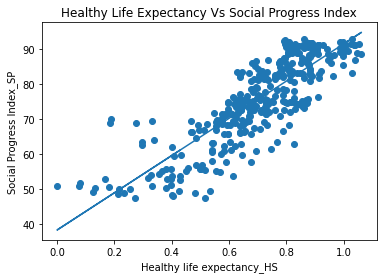

In [15]:
import matplotlib.pyplot as plt
from scipy import stats

x = Healthylife_Vs_SocialProgress_df["Healthy life expectancy_HS"]
y = Healthylife_Vs_SocialProgress_df["Social Progress Index_SP"]


plt.xlabel("Healthy life expectancy_HS")
plt.ylabel("Social Progress Index_SP")
plt.title("Healthy Life Expectancy Vs Social Progress Index")


slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

From the above graphs we observe that there is a direct relationship betweeen Healthy Life Expectancey and Social Progress Index. 




In [16]:

slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)


0.843515435236016


In [ ]:
#calculate R^2 to measure correlation
print(r**2)

In [30]:
#P stands for probability and measures how likely it is that any observed difference between groups is due to chance.
print (p)




0.0011059358672084036


In [19]:
print (std_err)

1.7641412623347006



## Is "Perceptions of corruption_HS" the least Happiness indicator that predicts "Social Progress Score" ?


  * Alternate hypothesis - If "Perceptions of corruption_HS" is the worst Happiness indicator that predicts Social Progress Index, then there will not be a strong correlation between Perceptions of corruption_HS and Social Progress Index.


  * Null Hypothesis -If "Perceptions of corruption_HS" is not the worst Happiness indicator that predicts Social Progress Index, then we will observe a linear correlation between perceptions of corruption_HS and Social Progress Index.


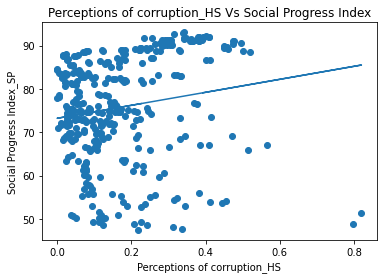

In [24]:
import matplotlib.pyplot as plt
from scipy import stats

x = Healthylife_Vs_SocialProgress_df["Perceptions of corruption_HS"]
y = Healthylife_Vs_SocialProgress_df["Social Progress Index_SP"]


plt.xlabel("Perceptions of corruption_HS")
plt.ylabel("Social Progress Index_SP")
plt.title("Perceptions of corruption_HS​ Vs Social Progress Index")


slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [25]:
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)

0.1687130560252955


In [26]:
#calculate R^2 to measure correlation
print(r**2)

0.028464095273394493


In [27]:
print (std_err)

4.567927151642043


In [29]:
#value is statistically significant
print(p)

0.0011059358672084036
